In [1]:
import geocoder

In [26]:
g = geocoder.osm('机场东站，深圳市', key='e6dac96374f06744d169e51fb4523ed5')

In [27]:
g.json

{'encoding': 'utf-8',
 'location': '机场东站，深圳市',
 'ok': False,
 'provider': 'osm',
 'status': 'ERROR - No results found',
 'status_code': 200}

In [2]:
g = geocoder.baidu('深圳北站', key='qnwCXcLFq4VWd7qqmqXzBf5G2156qL19')

In [3]:
g.json

{'accuracy': 60,
 'encoding': 'utf-8',
 'lat': 22.57363148121673,
 'lng': 114.1231236015825,
 'location': '深圳北站',
 'ok': True,
 'provider': 'baidu',
 'quality': '火车站',
 'status': 'OK',
 'status_code': 200}

In [29]:
g.json['lng']

114.1231236015825

In [7]:
import pandas as pd

In [8]:
df = pd.read_csv('D:/work/08.2017深圳AFC网络化方案投标/进站/stations.txt', sep='\s', index_col=False)
df.head(3)

C:\Users\wei\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  """Entry point for launching an IPython kernel.


,line_id,name,name2,op_id,station_id,line_name
0,241,红树湾南,"""红树湾南站,深圳市""",1241013000,241013,十一号线
1,241,后海,"""后海站,深圳市""",1260019000,241014,十一号线
2,241,南山,"""南山站,深圳市""",1241015000,241015,十一号线


In [9]:
import time

In [28]:
start = time.time()
location = {}
for i in range(len(df)):
    k = df['name'][i]
    name = df['name2'][i]
    location[k] = geocoder.baidu(name, key='XatGhUNrLFLMLrfKQsbMDy5K').json
    time.sleep(1)
    if i % 10 == 0:
        print("finished %d" % i)
end = time.time()

finished 0
finished 10
finished 20
finished 30
finished 40
finished 50
finished 60
finished 70
finished 80
finished 90
finished 100
finished 110
finished 120
finished 130
finished 140
finished 150
finished 160
finished 170


In [29]:
location

{'上梅林': {'accuracy': 60,
  'encoding': 'utf-8',
  'lat': 22.57576987280131,
  'lng': 114.06613759913427,
  'location': '"上梅林站,深圳市"',
  'ok': True,
  'provider': 'baidu',
  'quality': '火车站',
  'status': 'OK',
  'status_code': 200},
 '上水径': {'accuracy': 80,
  'encoding': 'utf-8',
  'lat': 22.628750910211927,
  'lng': 114.1113995648501,
  'location': '"上水径站,深圳市"',
  'ok': True,
  'provider': 'baidu',
  'quality': 'UNKNOWN',
  'status': 'OK',
  'status_code': 200},
 '上沙': {'accuracy': 40,
  'encoding': 'utf-8',
  'lat': 22.529860996714664,
  'lng': 114.03734036608824,
  'location': '"上沙站,深圳市"',
  'ok': True,
  'provider': 'baidu',
  'quality': '商圈',
  'status': 'OK',
  'status_code': 200},
 '下梅林': {'accuracy': 40,
  'encoding': 'utf-8',
  'lat': 22.569731924729986,
  'lng': 114.04804646098317,
  'location': '"下梅林站,深圳市"',
  'ok': True,
  'provider': 'baidu',
  'quality': '商圈',
  'status': 'OK',
  'status_code': 200},
 '下水径': {'accuracy': 50,
  'encoding': 'utf-8',
  'lat': 22.62174351284231

In [18]:
df.head(3)

,line_id,name,name2,op_id,station_id,line_name
0,241,红树湾南,"""红树湾南,","深圳市""",1241013000,241013
1,241,后海,"""后海,","深圳市""",1260019000,241014
2,241,南山,"""南山,","深圳市""",1241015000,241015


In [25]:
df2 = pd.read_csv('D:/work/08.2017深圳AFC网络化方案投标/进站/stations.txt', index_col=False, encoding='gbk', sep='\s')

C:\Users\wei\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  """Entry point for launching an IPython kernel.


In [26]:
df2.head(3)

,line_id,name,name2,op_id,station_id,line_name
0,241,红树湾南,"""红树湾南,深圳市""",1241013000,241013,十一号线
1,241,后海,"""后海,深圳市""",1260019000,241014,十一号线
2,241,南山,"""南山,深圳市""",1241015000,241015,十一号线


In [36]:
loc = []
for i in range(10):
    name = df2['name'][i]
    if name in location.keys():
        lng = location[name]['lng']
        lat = location[name]['lat']
#         loc.append((lng, lat))
    else:
        loc.append('NA')
    if i % 10 ==0:
        print(" finished %d" %i)
    

 finished 0


KeyError: 'lng'

In [31]:
location['红树湾南']['lng']

113.34312546650962

In [30]:
pd.DataFrame.from_dict(location,orient='index' )

,accuracy,encoding,lat,lng,location,ok,provider,quality,status,status_code
上梅林,60,utf-8,22.575770,114.066138,"""上梅林站,深圳市""",True,baidu,火车站,OK,200
上水径,80,utf-8,22.628751,114.111400,"""上水径站,深圳市""",True,baidu,UNKNOWN,OK,200
上沙,40,utf-8,22.529861,114.037340,"""上沙站,深圳市""",True,baidu,商圈,OK,200
下梅林,40,utf-8,22.569732,114.048046,"""下梅林站,深圳市""",True,baidu,商圈,OK,200
下水径,50,utf-8,22.621744,114.114527,"""下水径站,深圳市""",True,baidu,UNKNOWN,OK,200
下沙,40,utf-8,22.532275,114.033481,"""下沙站,深圳市""",True,baidu,商圈,OK,200
世界之窗,80,utf-8,22.538631,114.006944,"""世界之窗站,深圳市""",True,baidu,购物,OK,200
东角头,50,utf-8,22.491121,113.945561,"""东角头站,深圳市""",True,baidu,UNKNOWN,OK,200
临海,60,utf-8,22.551153,113.895255,"""临海站,深圳市""",True,baidu,火车站,OK,200
丹竹头,40,utf-8,22.631174,114.155662,"""丹竹头站,深圳市""",True,baidu,UNKNOWN,OK,200


In [31]:
df_location = pd.DataFrame.from_dict(location,orient='index' )

In [34]:
df_location = df_location.reset_index()

In [35]:
df_location = df_location[['index','lng','lat']]

In [36]:
df_location.head(3)

,index,lng,lat
0,上梅林,114.066138,22.575770
1,上水径,114.111400,22.628751
2,上沙,114.037340,22.529861


In [37]:
df_location = df_location.rename(columns={'index':'name','lng':'lng_bd', 'lat':'lat_bd'})

In [38]:
df_location.head(3)

,name,lng_bd,lat_bd
0,上梅林,114.066138,22.575770
1,上水径,114.111400,22.628751
2,上沙,114.037340,22.529861


In [43]:
df3 = pd.merge(df2, df_location,on='name',right='index')
df3.head(3)

TypeError: merge() got multiple values for argument 'right'

In [20]:
from geopy.geocoders import Nominatim

In [21]:
df.head(3)

,line_id,name,name2,op_id,station_id,line_name
0,241,红树湾南,"""红树湾南站,深圳市""",1241013000,241013,十一号线
1,241,后海,"""后海站,深圳市""",1260019000,241014,十一号线
2,241,南山,"""南山站,深圳市""",1241015000,241015,十一号线


In [22]:
geolocator = Nominatim()

In [23]:
location = geolocator.geocode(df['name'][1])

GeocoderTimedOut: Service timed out

In [39]:
import coordTransform as coord

In [53]:
wgs84 = []
for i in range(len(df_location)):
    result = coord.bd09_to_wgs84(float(df_location['lng_bd'][i]), float(df_location['lat_bd'][i]))
    wgs84.append(result)

In [51]:
coord.bd09_to_wgs84(float(df_location['lng_bd'][1]), float(df_location['lat_bd'][1]))

[114.09982724585196, 22.62518341491061]

In [45]:
df_location['lng_bd'][1]

114.1113995648501

In [46]:
df_location.dtypes

name       object
lng_bd    float64
lat_bd    float64
dtype: object

In [47]:
df_location['lat_bd'][1]

22.628750910211927

In [48]:
coord.bd09_to_wgs84(114.1113995648501,22.628750910211927)

[114.09982724585196, 22.62518341491061]

In [54]:
df_location['wgs'] = wgs84

In [56]:
df_location.head(3)

,name,lng_bd,lat_bd,wgs
0,上梅林,114.066138,22.575770,"[114.05444265895426, 22.572822086046738]"
1,上水径,114.111400,22.628751,"[114.09982724585196, 22.62518341491061]"
2,上沙,114.037340,22.529861,"[114.02578867248968, 22.526658495241264]"


In [60]:
lng_84 = []
lat_84 = []
for i in range(len(df_location)):
    lng_84.append(df_location.wgs[i][0])
    lat_84.append(df_location.wgs[i][1])

In [62]:
df_location['lng_wgs84'] = lng_84
df_location['lat_wgs84'] = lat_84
df_location.head(3)

,name,lng_bd,lat_bd,wgs,lng_wgs84,lat_wgs84
0,上梅林,114.066138,22.575770,"[114.05444265895426, 22.572822086046738]",114.054443,22.572822
1,上水径,114.111400,22.628751,"[114.09982724585196, 22.62518341491061]",114.099827,22.625183
2,上沙,114.037340,22.529861,"[114.02578867248968, 22.526658495241264]",114.025789,22.526658


In [63]:
df_location.to_csv('df_location.txt', index=False)

In [66]:
df_location[(df_location.lat_wgs84 >=28)]

,name,lng_bd,lat_bd,wgs,lng_wgs84,lat_wgs84
14,侨城北,101.712664,36.686368,"[101.70415010858831, 36.680728464946775]",101.704150,36.680728
87,洪湖,113.538915,29.996772,"[113.52677573580017, 29.993151728057143]",113.526776,29.993152


In [67]:
import folium

In [73]:
map = folium.Map(location = [22.56845, 114.11725],zoom_start =13)

In [74]:
map.add_child(folium.LatLngPopup())

In [75]:
df_location.loc[df_location.name.isin(['侨城北','洪湖'])]

,name,lng_bd,lat_bd,wgs,lng_wgs84,lat_wgs84
14,侨城北,101.712664,36.686368,"[101.70415010858831, 36.680728464946775]",101.704150,36.680728
87,洪湖,113.538915,29.996772,"[113.52677573580017, 29.993151728057143]",113.526776,29.993152


In [76]:
df_location.loc[df_location.name.isin(['侨城北'])].lng_wgs84 = 113.9839
df_location.loc[df_location.name.isin(['侨城北'])].lat_wgs84 = 22.5472

C:\Users\wei\Anaconda3\lib\site-packages\pandas\core\generic.py:2999: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


In [77]:
df_location.loc[df_location.name.isin(['洪湖'])].lng_wgs84 = 114.1173
df_location.loc[df_location.name.isin(['洪湖'])].lat_wgs84 = 22.5687

C:\Users\wei\Anaconda3\lib\site-packages\pandas\core\generic.py:2999: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


In [78]:
df_location.loc[df_location.name.isin(['侨城北','洪湖'])]

,name,lng_bd,lat_bd,wgs,lng_wgs84,lat_wgs84
14,侨城北,101.712664,36.686368,"[101.70415010858831, 36.680728464946775]",101.704150,36.680728
87,洪湖,113.538915,29.996772,"[113.52677573580017, 29.993151728057143]",113.526776,29.993152


In [80]:
df_location.iloc[14,4]=113.9839
df_location.iloc[14,5]=22.5472

In [81]:
df_location.iloc[87,4]=114.1173
df_location.iloc[87,5]=22.5687

In [82]:
df_location.loc[df_location.name.isin(['侨城北','洪湖'])]

,name,lng_bd,lat_bd,wgs,lng_wgs84,lat_wgs84
14,侨城北,101.712664,36.686368,"[101.70415010858831, 36.680728464946775]",113.9839,22.5472
87,洪湖,113.538915,29.996772,"[113.52677573580017, 29.993151728057143]",114.1173,22.5687


In [83]:
df_location.drop('wgs',axis=1).to_csv('df_location.txt', index=False)

### metroline network

In [84]:
point = (22.7, 114.2)

In [98]:
dist = 45000

In [99]:
import osmnx as ox

In [100]:
%time G_metro = ox.graph_from_point(point, distance =dist, retain_all = True, truncate_by_edge = True, simplify = False,  network_type = 'none', infrastructure = 'way["railway"~"subway"]' )

Wall time: 11.5 s


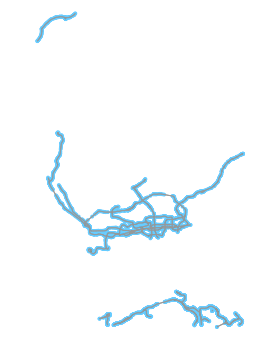

In [101]:
fig, ax = ox.plot_graph(G_metro)

In [102]:
ox.save_load.save_graph_shapefile(G_metro, filename='shenzhen_metro_utf8', folder=None, encoding='utf-8')